In [10]:

from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util, image_util
from PIL import Image
from tensorflow.python.client import device_lib
print (device_lib.list_local_devices())


data_provider = image_util.NoduleDataProvider('tifdata/*.tif', 'validation_set/*.tif', 
                                              n_class=2, downsample = 1)

net = unet.Unet(layers=3, features_root=4, channels=1, n_class=2, gpu_ratio=1)

2018-05-15 17:12:08,499 Layers 3, features 4, filter size 3x3, pool size: 2x2


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10392458001575370433
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6540453479
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12494378587881158999
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


In [11]:
n_points = 4
data, label = data_provider(n_points)

data.shape

(4, 1024, 1024, 1)

In [12]:
n_points = 4
data, label = data_provider(n_points, verification = False)

data.shape



(4, 1024, 1024, 1)

(4, 1024, 1024, 2)

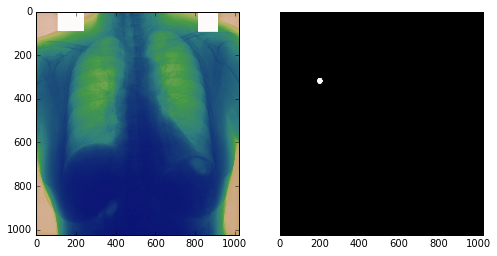

In [13]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(data[0,...,0], aspect="auto")
ax[1].imshow(label[0,:,:,1], aspect="auto")

label.shape

In [14]:
trainer = unet.Trainer(net, batch_size=4, gpu_ratio=1)

In [15]:
path = trainer.train(data_provider, 'output_data', training_iters=5, epochs=5)

2018-05-15 17:12:12,451 Removing '/home/msekni/day2/stage1/prediction'
2018-05-15 17:12:12,453 Removing '/home/msekni/day2/stage1/output_data'
2018-05-15 17:12:12,454 Allocating '/home/msekni/day2/stage1/prediction'
2018-05-15 17:12:12,455 Allocating '/home/msekni/day2/stage1/output_data'


(34, 1024, 1024, 1)


2018-05-15 17:12:16,274 Verification error= 9.5%, loss= 0.6838
2018-05-15 17:12:24,414 Start optimization
2018-05-15 17:12:26,110 Iter 0, Minibatch Loss= 1.7273, Training Accuracy= 0.9993, Minibatch error= 0.1%
2018-05-15 17:12:27,063 Iter 1, Minibatch Loss= 0.6931, Training Accuracy= 0.9972, Minibatch error= 0.3%
2018-05-15 17:12:27,967 Iter 2, Minibatch Loss= 0.6931, Training Accuracy= 0.9917, Minibatch error= 0.8%
2018-05-15 17:12:28,936 Iter 3, Minibatch Loss= 0.6931, Training Accuracy= 0.9972, Minibatch error= 0.3%
2018-05-15 17:12:29,916 Iter 4, Minibatch Loss= 0.6931, Training Accuracy= 0.9976, Minibatch error= 0.2%
2018-05-15 17:12:29,917 Epoch 0, Average loss: 3.1903, learning rate: 0.2000
2018-05-15 17:12:32,716 Verification error= 0.2%, loss= 0.6931
/home/msekni/day2/stage1/tf_unet/util.py:74: RuntimeWarning: invalid value encountered in true_divide
  img /= np.amax(img)
2018-05-15 17:12:41,541 Iter 5, Minibatch Loss= 0.6931, Training Accuracy= 0.9981, Minibatch error= 0.2%
